In [8]:
#####Set librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import ndimage

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate

In [9]:
#####import data including only Aver_delta, R(grain size), and cluster_label
delta_ratio_cluster_all = pd.read_csv('delta_ratio_cluster_all.csv')
delta_ratio_cluster_all.head()

,Aver_delta,L,clust_label
0,1.772541,2.334865,1
1,-0.274095,2.247809,0
2,1.084926,2.502850,1
3,-0.698569,1.062790,0
4,-0.341247,2.092551,0


In [10]:
#####data split
X_features = delta_ratio_cluster_all.iloc[:, :-1]
y_labels = delta_ratio_cluster_all.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels,
                                                    test_size = 0.1, stratify = y_labels)

train_cnt = y_train.count()
test_cnt = y_test.count()
print('train shape:', train_cnt)
print('test shape:', test_cnt)

print('ratio for each label value in training set')
print(y_train.value_counts()/train_cnt)
print('ratio for each label value in testing set')
print(y_test.value_counts()/test_cnt)

train shape: 75
test shape: 9
ratio for each label value in training set
0    0.626667
1    0.373333
Name: clust_label, dtype: float64
ratio for each label value in testing set
0    0.666667
1    0.333333
Name: clust_label, dtype: float64


In [11]:
#####Training data
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)

print('accuracy:{0:.3f}'.format(accuracy_score(y_test, lr_pred)))
print('roc_auc:{0:.3f}'.format(roc_auc_score(y_test, lr_pred)))

accuracy:1.000
roc_auc:1.000


In [12]:
#####Confirm predict values for X_test data
lr_predict = lr_clf.predict_proba(X_test)
lr_predict

array([[0.738893  , 0.261107  ],
       [0.01779191, 0.98220809],
       [0.96956642, 0.03043358],
       [0.2185754 , 0.7814246 ],
       [0.96560516, 0.03439484],
       [0.68225638, 0.31774362],
       [0.69333747, 0.30666253],
       [0.86345988, 0.13654012],
       [0.00409991, 0.99590009]])

In [13]:
#####Trained model validation (cross validation)
scores = cross_val_score(lr_clf, X_features, y_labels, scoring = 'accuracy', cv = 10)

print('Cross validation accuracy:', np.round(scores, 4))
print('Average accuracy:', np.round(np.mean(scores),4))
recall_scores = cross_val_score(lr_clf, X_features, y_labels, scoring = 'recall', cv = 10)
print('Cross validation recall:', np.round(recall_scores, 4))
print('Average recall:', np.round(np.mean(recall_scores),4))
precision_scores = cross_val_score(lr_clf, X_features, y_labels, scoring = 'precision', cv = 10)
print('Cross validation precision:', np.round(precision_scores, 4))
print('Average precision:', np.round(np.mean(precision_scores),4))
precision_scores = cross_val_score(lr_clf, X_features, y_labels, scoring = 'f1', cv = 10)
print('Cross validation f1:', np.round(precision_scores, 4))
print('Average f1:', np.round(np.mean(precision_scores),4))
roc_auc_scores = cross_val_score(lr_clf, X_features, y_labels, scoring = 'roc_auc', cv = 10)
print('Cross validation roc_auc:', np.round(roc_auc_scores, 4))
print('Average roc_auc:', np.round(np.mean(roc_auc_scores),4))

Cross validation accuracy: [1.    1.    1.    1.    0.75  1.    0.875 1.    1.    1.   ]
Average accuracy: 0.9625
Cross validation recall: [1.     1.     1.     1.     0.3333 1.     0.6667 1.     1.     1.    ]
Average recall: 0.9
Cross validation precision: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Average precision: 1.0
Cross validation f1: [1.  1.  1.  1.  0.5 1.  0.8 1.  1.  1. ]
Average f1: 0.93
Cross validation roc_auc: [1.     1.     1.     1.     0.9333 1.     1.     1.     1.     1.    ]
Average roc_auc: 0.9933


In [14]:
#####Import frame data set for probability map
Data = pd.read_csv('delta_ratio50x50.csv')
Data.head()

,Aver_delta,L
0,2.400000,1.0
1,2.326531,1.0
2,2.253061,1.0
3,2.179592,1.0
4,2.106122,1.0


In [16]:
#####Predict the frame data set
X_features_delta_ratio50x50 = Data[['Aver_delta','L']].values
lr_pred = lr_clf.predict(X_features_delta_size50x50)
lr_pred

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [17]:
#####Confrim predict_proba values of the predicted frame data set
probability = lr_clf.predict_proba(X_features_delta_ratio50x50)
Data['probability'] = probability[:, 1]
Data.head()

,Aver_delta,L,probability
0,2.400000,1.0,0.999193
1,2.326531,1.0,0.998966
2,2.253061,1.0,0.998675
3,2.179592,1.0,0.998302
4,2.106122,1.0,0.997825


In [18]:
#####Construct DataFrame for the predicted frame data set
plt.rcParams['figure.figsize'] = [10, 8]

df = Data.pivot('Aver_delta', 'L', 'probability')
df=df.sort_values(by='Aver_delta', ascending=False)
df.head(10)

L,1.000000,1.081633,1.163265,1.244898,1.326531,1.408163,1.489796,1.571429,1.653061,1.734694,...,4.265306,4.346939,4.428571,4.510204,4.591837,4.673469,4.755102,4.836735,4.918367,5.000000
Aver_delta,,,,,,,,,,,,,,,,,,,,,
2.400000,0.999193,0.999207,0.999221,0.999235,0.999248,0.999262,0.999275,0.999287,0.999300,0.999312,...,0.999603,0.999610,0.999617,0.999624,0.999631,0.999637,0.999643,0.999650,0.999656,0.999662
2.326531,0.998966,0.998984,0.999002,0.999019,0.999037,0.999054,0.999070,0.999087,0.999103,0.999118,...,0.999492,0.999501,0.999509,0.999518,0.999526,0.999535,0.999543,0.999551,0.999559,0.999567
2.253061,0.998675,0.998698,0.998721,0.998743,0.998766,0.998787,0.998809,0.998830,0.998850,0.998870,...,0.999348,0.999360,0.999371,0.999382,0.999393,0.999404,0.999414,0.999425,0.999435,0.999445
2.179592,0.998302,0.998332,0.998361,0.998390,0.998418,0.998446,0.998473,0.998500,0.998527,0.998553,...,0.999165,0.999180,0.999194,0.999208,0.999222,0.999236,0.999249,0.999263,0.999276,0.999288
2.106122,0.997825,0.997863,0.997900,0.997937,0.997973,0.998009,0.998044,0.998078,0.998112,0.998145,...,0.998930,0.998949,0.998967,0.998985,0.999003,0.999021,0.999038,0.999055,0.999072,0.999088
2.032653,0.997213,0.997262,0.997310,0.997358,0.997404,0.997450,0.997494,0.997538,0.997582,0.997624,...,0.998629,0.998653,0.998677,0.998700,0.998723,0.998745,0.998767,0.998789,0.998810,0.998831
1.959184,0.996431,0.996493,0.996555,0.996615,0.996675,0.996733,0.996791,0.996847,0.996902,0.996957,...,0.998243,0.998274,0.998304,0.998334,0.998363,0.998392,0.998420,0.998448,0.998475,0.998502
1.885714,0.995430,0.995510,0.995589,0.995666,0.995742,0.995817,0.995890,0.995962,0.996033,0.996102,...,0.997749,0.997789,0.997828,0.997866,0.997903,0.997940,0.997976,0.998012,0.998047,0.998081
1.812245,0.994150,0.994252,0.994353,0.994451,0.994549,0.994644,0.994738,0.994830,0.994921,0.995010,...,0.997117,0.997167,0.997217,0.997266,0.997314,0.997361,0.997408,0.997453,0.997498,0.997542


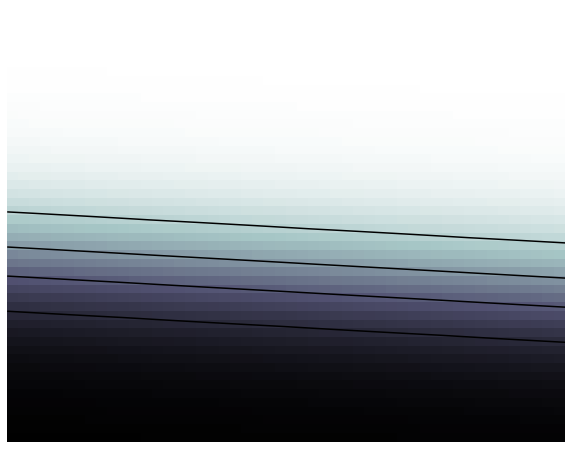

In [19]:
# Visualizing the predicted frame data set
fig, ax = plt.subplots()
smooth_scale = 1
z = ndimage.zoom(df.to_numpy(), smooth_scale)
cntr = ax.contour(np.linspace(0, len(df.columns), len(df.columns) * smooth_scale),
                  np.linspace(0, len(df.index), len(df.index) * smooth_scale),
                  z, levels=(0.2, 0.4, 0.6, 0.8), colors='black')
ax = sns.heatmap(df, cbar=False, ax=ax, cmap='bone', vmin=0, vmax=1)
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
figure = ax.get_figure()
#figure.savefig('delta_size_probability_map_all.pdf', dpi=600)

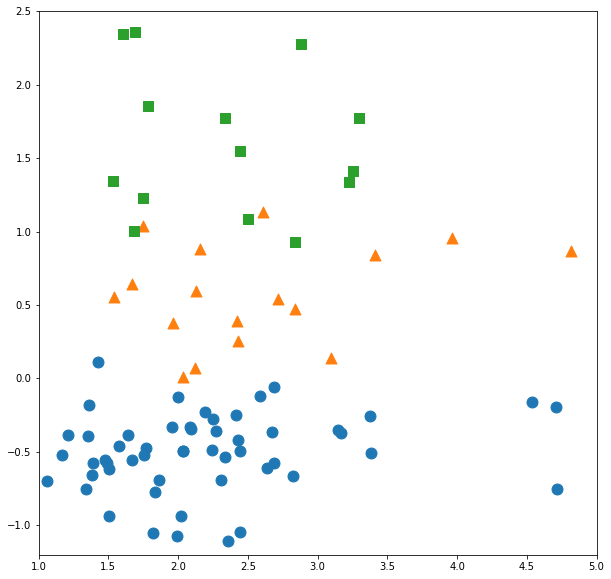

In [20]:
#####Visualizing spinel data set
delta_ratio_cluster_all_three = pd.read_csv('delta_ratio_cluster_all_three.csv')
marker0_ind = delta_ratio_cluster_all_three[delta_ratio_cluster_all_three['clust_label'] == 0].index
marker1_ind = delta_ratio_cluster_all_three[delta_ratio_cluster_all_three['clust_label'] == 1].index
marker2_ind = delta_ratio_cluster_all_three[delta_ratio_cluster_all_three['clust_label'] == 2].index

plt.rcParams["figure.figsize"] = (10, 10)
plt.scatter(x = delta_ratio_cluster_all_three.loc[marker0_ind, 'L'], y = delta_ratio_cluster_all_three.loc[marker0_ind, 'Aver_delta'], 
            marker = 'o', s=120)
plt.scatter(x = delta_ratio_cluster_all_three.loc[marker1_ind, 'L'], y = delta_ratio_cluster_all_three.loc[marker1_ind, 'Aver_delta'], 
            marker = '^', s=120)
plt.scatter(x = delta_ratio_cluster_all_three.loc[marker2_ind, 'L'], y = delta_ratio_cluster_all_three.loc[marker2_ind, 'Aver_delta'], 
            marker = 's', s=120)

plt.xlim([1, 5])
plt.ylim([-1.2, 2.5])
#plt.savefig('delta_ratio_scatter.pdf', dpi=600)
plt.show()